In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast

In [28]:
dataset = pd.read_csv(r"C:\Users\nabde\OneDrive - aivancity\Desktop\Projet Github\Bank_Loan Projet\financial_loan.csv")
df = dataset

df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_status
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11/02/2021,13/09/2021,13/04/2021,...,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,Charged Off
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01/01/2021,14/12/2021,15/01/2021,...,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,Fully Paid
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05/01/2021,12/12/2021,09/01/2021,...,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,Charged Off
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25/02/2021,12/12/2021,12/03/2021,...,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,Fully Paid
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01/01/2021,14/12/2021,15/01/2021,...,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11/07/2021,16/05/2021,16/05/2021,...,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946,Current
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11/10/2021,16/04/2021,16/05/2021,...,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870,Current
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11/09/2021,16/05/2021,16/05/2021,...,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721,Current
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11/10/2021,16/05/2021,16/05/2021,...,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677,Current


## Data Preprocessing

In [29]:
feature_names = df.columns.tolist()
feature_names

['id',
 'address_state',
 'application_type',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_date',
 'next_payment_date',
 'member_id',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment',
 'loan_status']

In [30]:
df.isnull().sum() # check for missing values

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
loan_status                 0
dtype: int64

In [31]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
loan_status               object
dtype: object

In [32]:
df.drop([
    'id',
    'member_id',
    'emp_title',
    'sub_grade',
    'last_payment_date',
    'next_payment_date',
    'total_payment',
    'last_credit_pull_date',
    'emp_length',
    'verification_status'
], axis=1, inplace=True)


In [33]:
df.head(10)

,address_state,application_type,grade,home_ownership,issue_date,purpose,term,annual_income,dti,installment,int_rate,loan_amount,total_acc,loan_status
0,GA,INDIVIDUAL,C,RENT,11/02/2021,car,60 months,30000.0,0.0100,59.83,0.1527,2500,4,Charged Off
1,CA,INDIVIDUAL,E,RENT,01/01/2021,car,36 months,48000.0,0.0535,109.43,0.1864,3000,4,Fully Paid
2,CA,INDIVIDUAL,C,RENT,05/01/2021,car,36 months,50000.0,0.2088,421.65,0.1596,12000,11,Charged Off
3,TX,INDIVIDUAL,B,MORTGAGE,25/02/2021,car,60 months,42000.0,0.0540,97.06,0.1065,4500,9,Fully Paid
4,IL,INDIVIDUAL,A,MORTGAGE,01/01/2021,car,36 months,83000.0,0.0231,106.53,0.0603,3500,28,Fully Paid
5,CA,INDIVIDUAL,C,RENT,17/07/2021,car,36 months,28000.0,0.1260,275.96,0.1465,8000,11,Fully Paid
6,TX,INDIVIDUAL,C,MORTGAGE,19/11/2021,car,36 months,94800.0,0.2453,205.86,0.1427,6000,30,Fully Paid
7,PA,INDIVIDUAL,A,OWN,11/06/2021,car,36 months,59000.0,0.0665,172.10,0.0790,5500,23,Fully Paid
8,FL,INDIVIDUAL,A,MORTGAGE,02/09/2021,car,36 months,116400.0,0.0394,762.08,0.0890,24000,31,Charged Off
9,MI,INDIVIDUAL,B,MORTGAGE,09/02/2021,car,60 months,36000.0,0.1773,93.21,0.1269,4125,21,Fully Paid


In [34]:
# changing the y to numeric value easy for preprocessing

df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)


In [35]:
df

,address_state,application_type,grade,home_ownership,issue_date,purpose,term,annual_income,dti,installment,int_rate,loan_amount,total_acc,loan_status
0,GA,INDIVIDUAL,C,RENT,11/02/2021,car,60 months,30000.0,0.0100,59.83,0.1527,2500,4,0
1,CA,INDIVIDUAL,E,RENT,01/01/2021,car,36 months,48000.0,0.0535,109.43,0.1864,3000,4,1
2,CA,INDIVIDUAL,C,RENT,05/01/2021,car,36 months,50000.0,0.2088,421.65,0.1596,12000,11,0
3,TX,INDIVIDUAL,B,MORTGAGE,25/02/2021,car,60 months,42000.0,0.0540,97.06,0.1065,4500,9,1
4,IL,INDIVIDUAL,A,MORTGAGE,01/01/2021,car,36 months,83000.0,0.0231,106.53,0.0603,3500,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,NJ,INDIVIDUAL,C,MORTGAGE,11/07/2021,wedding,60 months,100000.0,0.1986,551.64,0.1299,24250,33,0
38572,NY,INDIVIDUAL,C,RENT,11/10/2021,wedding,60 months,50000.0,0.0458,579.72,0.1349,25200,18,0
38573,CA,INDIVIDUAL,D,RENT,11/09/2021,wedding,60 months,65000.0,0.1734,627.93,0.1749,25000,20,0
38574,NY,INDIVIDUAL,D,RENT,11/10/2021,wedding,60 months,368000.0,0.0009,612.72,0.1825,24000,9,0


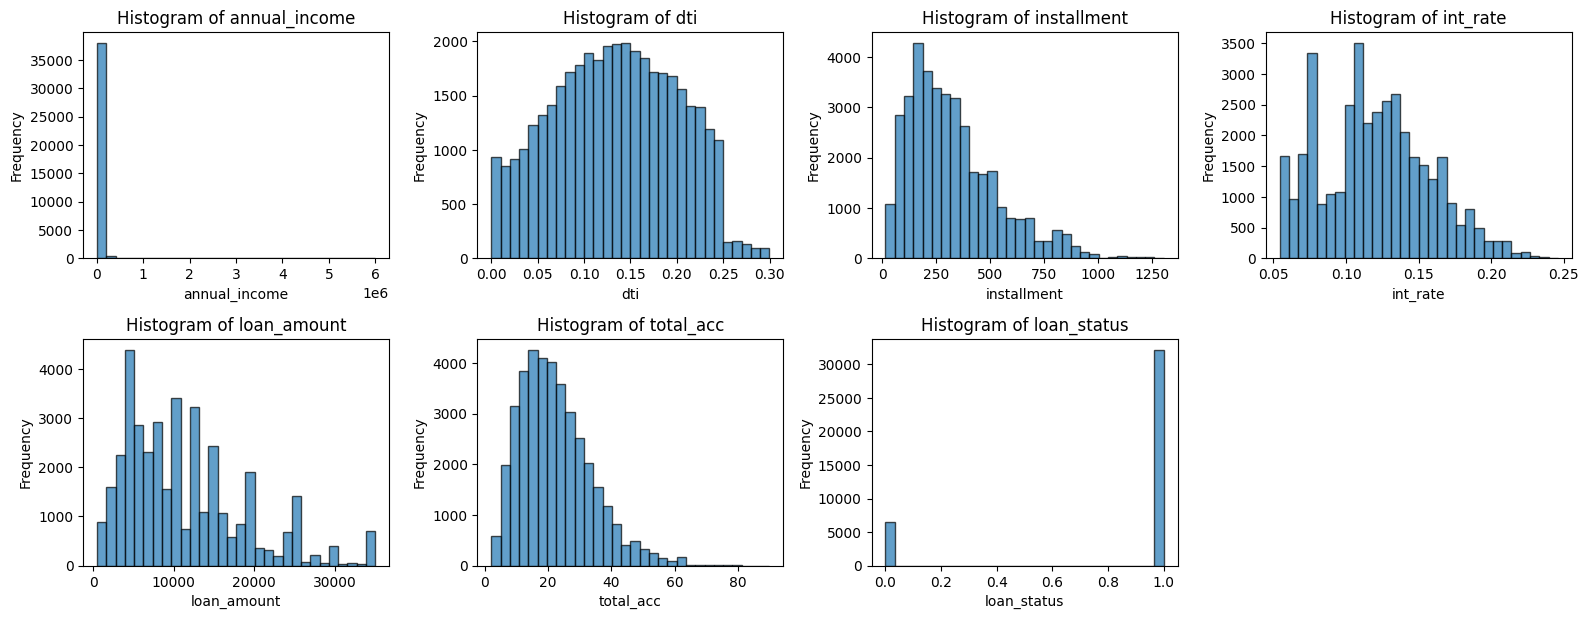

In [36]:
numerical_cols_features = [
    'annual_income',
    'dti',
    'installment',
    'int_rate',
    'loan_amount',
    'total_acc',
    'loan_status'
]
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_cols_features, 1):
    plt.subplot(4, 4, i)  # Arrange plots in a 4x4 grid
    df[feature].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

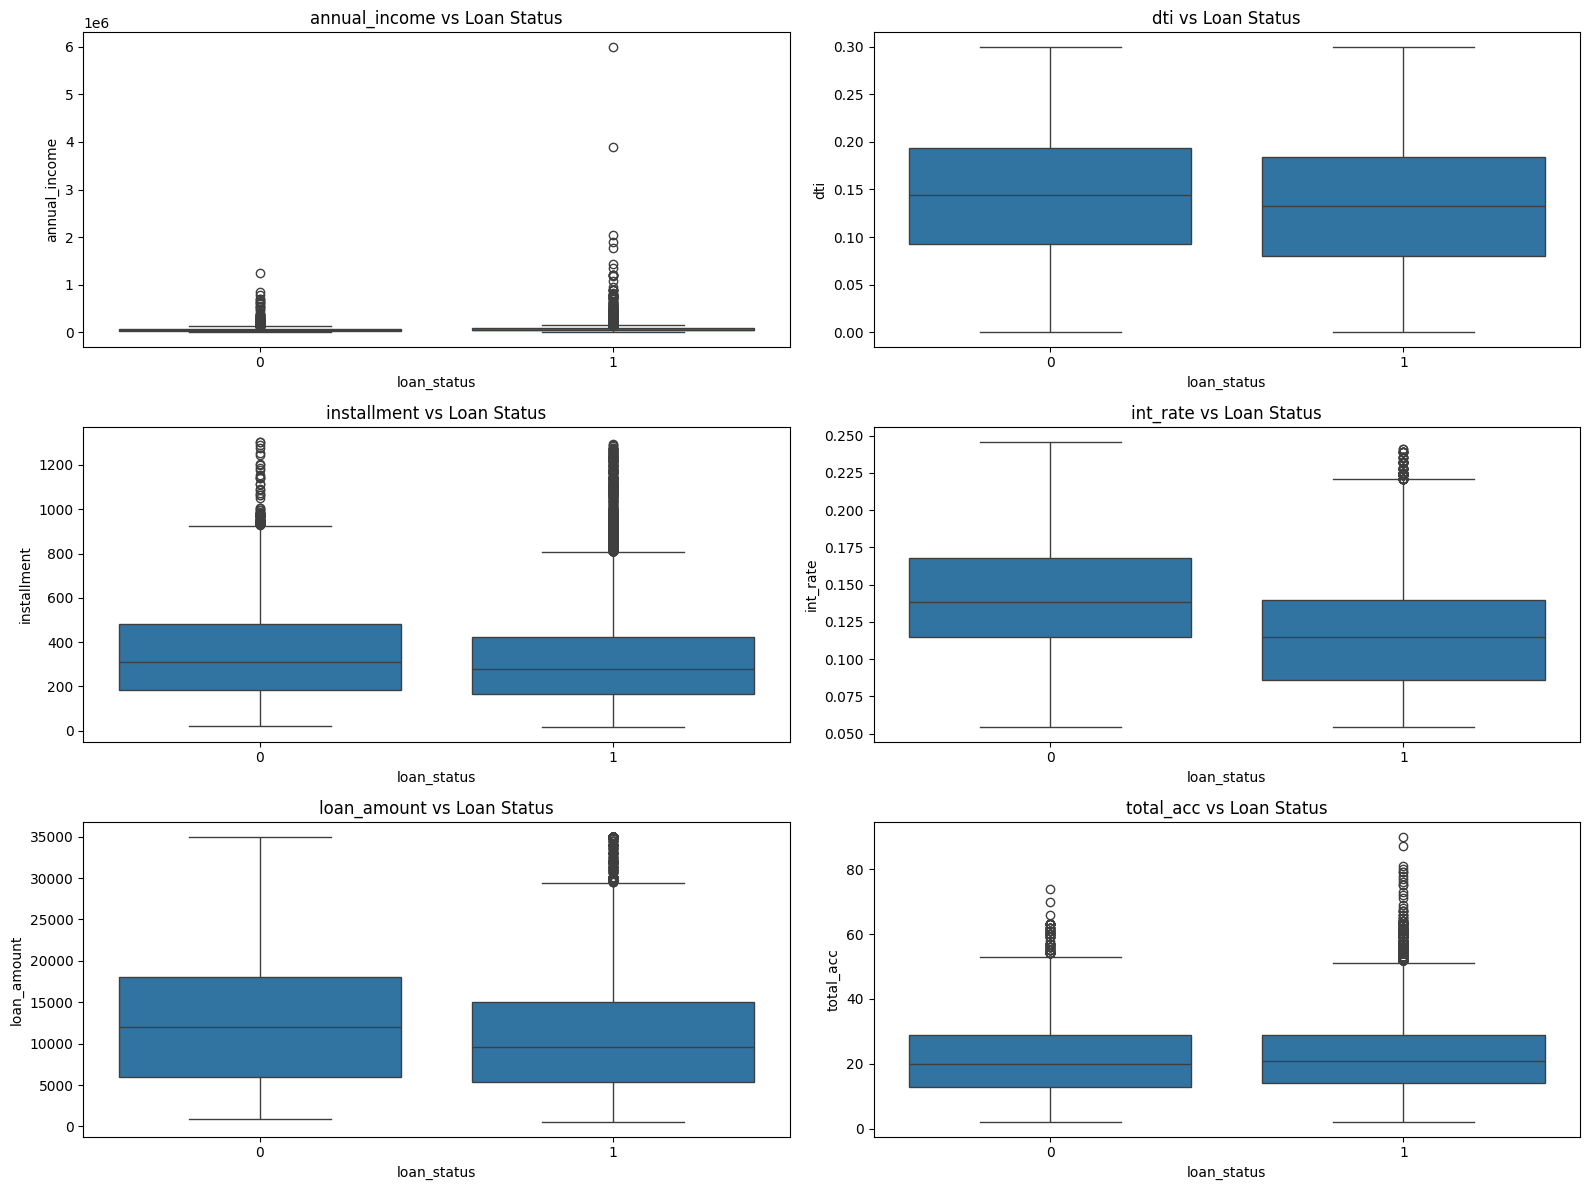

In [37]:

numerical_cols_features = [
    'annual_income',
    'dti',
    'installment',
    'int_rate',
    'loan_amount',
    'total_acc'
]

plt.figure(figsize=(16, 12))  

for i, feature in enumerate(numerical_cols_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='loan_status', y=feature, data=df)
    plt.title(f'{feature} vs Loan Status')
    plt.tight_layout()

plt.show()


In [38]:
df.dtypes

address_state        object
application_type     object
grade                object
home_ownership       object
issue_date           object
purpose              object
term                 object
annual_income       float64
dti                 float64
installment         float64
int_rate            float64
loan_amount           int64
total_acc             int64
loan_status           int64
dtype: object

In [39]:
df = df.drop(columns=['issue_date'])


In [40]:
df

,address_state,application_type,grade,home_ownership,purpose,term,annual_income,dti,installment,int_rate,loan_amount,total_acc,loan_status
0,GA,INDIVIDUAL,C,RENT,car,60 months,30000.0,0.0100,59.83,0.1527,2500,4,0
1,CA,INDIVIDUAL,E,RENT,car,36 months,48000.0,0.0535,109.43,0.1864,3000,4,1
2,CA,INDIVIDUAL,C,RENT,car,36 months,50000.0,0.2088,421.65,0.1596,12000,11,0
3,TX,INDIVIDUAL,B,MORTGAGE,car,60 months,42000.0,0.0540,97.06,0.1065,4500,9,1
4,IL,INDIVIDUAL,A,MORTGAGE,car,36 months,83000.0,0.0231,106.53,0.0603,3500,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,NJ,INDIVIDUAL,C,MORTGAGE,wedding,60 months,100000.0,0.1986,551.64,0.1299,24250,33,0
38572,NY,INDIVIDUAL,C,RENT,wedding,60 months,50000.0,0.0458,579.72,0.1349,25200,18,0
38573,CA,INDIVIDUAL,D,RENT,wedding,60 months,65000.0,0.1734,627.93,0.1749,25000,20,0
38574,NY,INDIVIDUAL,D,RENT,wedding,60 months,368000.0,0.0009,612.72,0.1825,24000,9,0


## Encoding Categorical cols

In [41]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # keep other columns as is
)

X_encoded = ct.fit_transform(x)


X_encoded


array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.527e-01, 2.500e+03,
        4.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.864e-01, 3.000e+03,
        4.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.596e-01, 1.200e+04,
        1.100e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.749e-01, 2.500e+04,
        2.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.825e-01, 2.400e+04,
        9.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.099e-01, 1.800e+04,
        7.000e+00]])

## Splitting Into Training Test steps

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =  train_test_split( X_encoded, y , test_size=0.25, random_state=42)

## Frature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Applying PCA

In [45]:
from sklearn.decomposition import PCA
pca = PCA()  
pca.fit_transform(x_train)

pca.n_components_

79

In [46]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x+1) for x in range(79)],
        "Explained Variance" : pca.explained_variance_,
        "% explained variance" : np.round(pca.explained_variance_ratio_*100),
        "% cumulative expl. variance" : np.round(np.cumsum(pca.explained_variance_ratio_)*100)
    }
)
eig.head(79)

,Dimension,Explained Variance,% explained variance,% cumulative expl. variance
0,Dim1,2.864410,4.0,4.0
1,Dim2,1.876034,2.0,6.0
2,Dim3,1.499519,2.0,8.0
3,Dim4,1.346798,2.0,10.0
4,Dim5,1.285326,2.0,11.0
...,...,...,...,...
74,Dim75,0.470013,1.0,99.0
75,Dim76,0.442900,1.0,100.0
76,Dim77,0.028410,0.0,100.0
77,Dim78,0.023367,0.0,100.0


In [47]:
pca = PCA(n_components=79) 
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

## Training the model

In [48]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(

)
classifier.fit(x_train,y_train)

RandomForestClassifier()

## Evaluating Model

In [49]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8292202405640813
Precision: 0.8403846153846154
Recall: 0.9809203142536476
F1 Score: 0.9052304505437597
Confusion Matrix:
 [[ 131 1494]
 [ 153 7866]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.08      0.14      1625
           1       0.84      0.98      0.91      8019

    accuracy                           0.83      9644
   macro avg       0.65      0.53      0.52      9644
weighted avg       0.78      0.83      0.78      9644



## Pyqt Task

In [ ]:
import pickle

# After training (in your Jupyter Notebook/script):
with open('column_transformer.pkl', 'wb') as f:
    pickle.dump(ct, f)  # Save fitted ColumnTransformer

with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)  # Save fitted StandardScaler

with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)  # Save fitted PCA

with open('model.pkl', 'wb') as f:
    pickle.dump(classifier, f)  # Save trained model

: 

In [ ]:
import sys
import numpy as np
from PyQt5.QtWidgets import (QApplication, QMainWindow, QWidget, QVBoxLayout, QHBoxLayout, 
                             QLabel, QLineEdit, QComboBox, QPushButton, QGroupBox, 
                             QFormLayout, QMessageBox, QFrame)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QFont, QPixmap
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class LoanPredictionApp(QMainWindow):
    def __init__(self, classifier, ct):
        super().__init__()
        self.classifier = classifier
        self.ct = ct  # ColumnTransformer object
        
        self.setWindowTitle("Bank Loan Prediction System")
        self.setGeometry(100, 100, 900, 700)
        self.setStyleSheet("""
            QMainWindow {
                background-color: #f5f5f5;
            }
            QGroupBox {
                border: 1px solid #ddd;
                border-radius: 5px;
                margin-top: 10px;
                padding-top: 15px;
            }
            QGroupBox::title {
                subcontrol-origin: margin;
                left: 10px;
                padding: 0 3px;
            }
            QPushButton {
                padding: 8px 16px;
                border-radius: 4px;
                font-weight: bold;
            }
            QLineEdit, QComboBox {
                padding: 6px;
                border: 1px solid #ccc;
                border-radius: 4px;
            }
        """)
        
        self.initUI()
        
    def initUI(self):
        main_widget = QWidget()
        main_layout = QVBoxLayout()
        main_layout.setSpacing(20)
        main_layout.setContentsMargins(20, 20, 20, 20)
        
        # Header with logo and title
        header_layout = QHBoxLayout()
        
        # Logo placeholder (you can replace with actual logo)
        logo_label = QLabel()
        logo_label.setPixmap(QPixmap("").scaled(60, 60, Qt.KeepAspectRatio))  # Add your logo path
        logo_label.setAlignment(Qt.AlignLeft)
        
        title_label = QLabel("Loan Repayment Prediction System")
        title_label.setFont(QFont('Arial', 20, QFont.Bold))
        title_label.setAlignment(Qt.AlignCenter)
        title_label.setStyleSheet("color: #2c3e50;")
        
        header_layout.addWidget(logo_label)
        header_layout.addWidget(title_label)
        header_layout.addStretch()
        main_layout.addLayout(header_layout)
        
        # Separator line
        separator = QFrame()
        separator.setFrameShape(QFrame.HLine)
        separator.setFrameShadow(QFrame.Sunken)
        separator.setStyleSheet("color: #ddd;")
        main_layout.addWidget(separator)
        
        # Input Form
        form_group = QGroupBox("Loan Application Details")
        form_group.setStyleSheet("""
            QGroupBox {
                font-size: 14px;
            }
        """)
        form_layout = QFormLayout()
        form_layout.setVerticalSpacing(15)
        form_layout.setHorizontalSpacing(20)
        
        # Personal Information
        personal_label = QLabel("Personal Information")
        personal_label.setStyleSheet("font-weight: bold; color: #3498db; font-size: 15px;")
        form_layout.addRow(personal_label)
        
        self.state_combo = QComboBox()
        self.state_combo.addItems(["CA", "TX", "GA", "IL", "NY", "FL", "Other"])
        
        self.application_type_combo = QComboBox()
        self.application_type_combo.addItems(["INDIVIDUAL", "JOINT"])
        
        self.grade_combo = QComboBox()
        self.grade_combo.addItems(["A", "B", "C", "D", "E", "F", "G"])
        
        self.home_ownership_combo = QComboBox()
        self.home_ownership_combo.addItems(["RENT", "MORTGAGE", "OWN", "OTHER"])
        
        self.purpose_combo = QComboBox()
        self.purpose_combo.addItems(["car", "credit_card", "debt_consolidation", "home_improvement", 
                                   "house", "major_purchase", "medical", "moving", "other", 
                                   "small_business", "vacation", "wedding"])
        
        self.term_combo = QComboBox()
        self.term_combo.addItems(["36 months", "60 months"])
        
        # Financial Information
        financial_label = QLabel("Financial Information")
        financial_label.setStyleSheet("font-weight: bold; color: #3498db; font-size: 15px; margin-top: 15px;")
        form_layout.addRow(financial_label)
        
        self.annual_income_input = QLineEdit()
        self.annual_income_input.setPlaceholderText("e.g. 50000")
        
        self.dti_input = QLineEdit()
        self.dti_input.setPlaceholderText("e.g. 0.05 for 5%")
        
        self.installment_input = QLineEdit()
        self.installment_input.setPlaceholderText("Monthly payment amount")
        
        self.int_rate_input = QLineEdit()
        self.int_rate_input.setPlaceholderText("e.g. 0.15 for 15%")
        
        self.loan_amount_input = QLineEdit()
        self.loan_amount_input.setPlaceholderText("Requested loan amount")
        
        self.total_acc_input = QLineEdit()
        self.total_acc_input.setPlaceholderText("Total number of credit lines")
        
        # Add rows to form with improved spacing
        form_layout.addRow(QLabel("State:"), self.state_combo)
        form_layout.addRow(QLabel("Application Type:"), self.application_type_combo)
        form_layout.addRow(QLabel("Grade:"), self.grade_combo)
        form_layout.addRow(QLabel("Home Ownership:"), self.home_ownership_combo)
        form_layout.addRow(QLabel("Loan Purpose:"), self.purpose_combo)
        form_layout.addRow(QLabel("Term:"), self.term_combo)
        
        form_layout.addRow(QLabel("Annual Income ($):"), self.annual_income_input)
        form_layout.addRow(QLabel("Debt-to-Income Ratio:"), self.dti_input)
        form_layout.addRow(QLabel("Installment ($):"), self.installment_input)
        form_layout.addRow(QLabel("Interest Rate:"), self.int_rate_input)
        form_layout.addRow(QLabel("Loan Amount ($):"), self.loan_amount_input)
        form_layout.addRow(QLabel("Total Credit Lines:"), self.total_acc_input)
        
        form_group.setLayout(form_layout)
        main_layout.addWidget(form_group)
        
        # Buttons
        button_layout = QHBoxLayout()
        button_layout.setSpacing(20)
        
        self.predict_button = QPushButton("Predict Repayment Status")
        self.predict_button.setStyleSheet("""
            QPushButton {
                background-color: #2ecc71;
                color: white;
                min-width: 150px;
                padding: 10px;
            }
            QPushButton:hover {
                background-color: #27ae60;
            }
        """)
        self.predict_button.clicked.connect(self.predict_loan_status)
        
        self.clear_button = QPushButton("Clear Form")
        self.clear_button.setStyleSheet("""
            QPushButton {
                background-color: #e74c3c;
                color: white;
                min-width: 150px;
                padding: 10px;
            }
            QPushButton:hover {
                background-color: #c0392b;
            }
        """)
        self.clear_button.clicked.connect(self.clear_form)
        
        button_layout.addStretch()
        button_layout.addWidget(self.clear_button)
        button_layout.addWidget(self.predict_button)
        button_layout.addStretch()
        main_layout.addLayout(button_layout)
        
        # Result Display
        self.result_frame = QFrame()
        self.result_frame.setFrameShape(QFrame.StyledPanel)
        self.result_frame.setStyleSheet("""
            QFrame {
                background-color: white;
                border-radius: 5px;
                padding: 20px;
            }
        """)
        result_layout = QVBoxLayout()
        
        self.result_title = QLabel("Prediction Result")
        self.result_title.setAlignment(Qt.AlignCenter)
        self.result_title.setStyleSheet("font-size: 18px; font-weight: bold; color: #2c3e50;")
        
        self.result_label = QLabel("Please submit the form to get a prediction")
        self.result_label.setAlignment(Qt.AlignCenter)
        self.result_label.setStyleSheet("font-size: 16px;")
        
        self.confidence_label = QLabel("")
        self.confidence_label.setAlignment(Qt.AlignCenter)
        self.confidence_label.setStyleSheet("font-size: 14px; color: #7f8c8d;")
        
        result_layout.addWidget(self.result_title)
        result_layout.addWidget(self.result_label)
        result_layout.addWidget(self.confidence_label)
        self.result_frame.setLayout(result_layout)
        
        main_layout.addWidget(self.result_frame)
        
        main_widget.setLayout(main_layout)
        self.setCentralWidget(main_widget)
        
    def predict_loan_status(self):
        try:
            # Get all input values
            input_data = {
                'address_state': self.state_combo.currentText(),
                'application_type': self.application_type_combo.currentText(),
                'grade': self.grade_combo.currentText(),
                'home_ownership': self.home_ownership_combo.currentText(),
                'purpose': self.purpose_combo.currentText(),
                'term': self.term_combo.currentText(),
                'annual_income': float(self.annual_income_input.text()),
                'dti': float(self.dti_input.text()),
                'installment': float(self.installment_input.text()),
                'int_rate': float(self.int_rate_input.text()),
                'loan_amount': float(self.loan_amount_input.text()),
                'total_acc': int(self.total_acc_input.text())
            }
            
            # Create a DataFrame with the input data (single row)
            input_df = pd.DataFrame([input_data])
            
            # Transform the input data using the ColumnTransformer
            encoded_input = self.ct.transform(input_df)
            
            # Make prediction
            prediction = self.classifier.predict(encoded_input)
            probability = self.classifier.predict_proba(encoded_input)
            
            # Display result with meaningful labels
            if prediction[0] == 1:
                result_text = "Likely to be Fully Paid"
                confidence = probability[0][1]*100
                self.result_label.setStyleSheet("color: #27ae60; font-size: 18px; font-weight: bold;")
            else:
                result_text = "Risk of Charging Off"
                confidence = probability[0][0]*100
                self.result_label.setStyleSheet("color: #e74c3c; font-size: 18px; font-weight: bold;")
                
            self.result_label.setText(result_text)
            self.confidence_label.setText(f"Confidence: {confidence:.1f}%")
            
        except ValueError as e:
            QMessageBox.warning(self, "Input Error", "Please enter valid numbers for all financial fields.")
        except Exception as e:
            QMessageBox.critical(self, "Error", f"An error occurred: {str(e)}")
    
    def clear_form(self):
        # Reset all inputs to default
        self.state_combo.setCurrentIndex(0)
        self.application_type_combo.setCurrentIndex(0)
        self.grade_combo.setCurrentIndex(0)
        self.home_ownership_combo.setCurrentIndex(0)
        self.purpose_combo.setCurrentIndex(0)
        self.term_combo.setCurrentIndex(0)
        
        self.annual_income_input.clear()
        self.dti_input.clear()
        self.installment_input.clear()
        self.int_rate_input.clear()
        self.loan_amount_input.clear()
        self.total_acc_input.clear()
        
        self.result_label.setText("Please submit the form to get a prediction")
        self.result_label.setStyleSheet("font-size: 16px; color: black;")
        self.confidence_label.setText("")

# Assuming you have your classifier and ColumnTransformer objects ready
if __name__ == "__main__":
    # Your existing code to prepare the data and train the model
    df = pd.DataFrame({
        'address_state': ['GA', 'CA', 'CA', 'TX', 'IL'],
        'application_type': ['INDIVIDUAL'] * 5,
        'grade': ['C', 'E', 'C', 'B', 'A'],
        'home_ownership': ['RENT', 'RENT', 'RENT', 'MORTGAGE', 'MORTGAGE'],
        'purpose': ['car'] * 5,
        'term': ['60 months', '36 months', '36 months', '60 months', '36 months'],
        'annual_income': [30000.0, 48000.0, 50000.0, 42000.0, 83000.0],
        'dti': [0.01, 0.0535, 0.2088, 0.054, 0.0231],
        'installment': [59.83, 109.43, 421.65, 97.06, 106.53],
        'int_rate': [0.1527, 0.1864, 0.1596, 0.1065, 0.0603],
        'loan_amount': [2500, 3000, 12000, 4500, 3500],
        'total_acc': [4, 4, 11, 9, 28],
        'loan_status': [0, 1, 0, 1, 1]  # 0 = Charged Off, 1 = Fully Paid
    })
    
    x = df.iloc[:,:-1]
    y = df.iloc[:,-1].values

    categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

    ct = ColumnTransformer(
        transformers=[
            ('encoder', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ],
        remainder='passthrough'
    )

    X_encoded = ct.fit_transform(x)
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)
    
    classifier = RandomForestClassifier()
    classifier.fit(x_train, y_train)
    
    # Now create and show the PyQt application
    app = QApplication(sys.argv)
    window = LoanPredictionApp(classifier, ct)
    window.show()
    sys.exit(app.exec_())